<a href="https://colab.research.google.com/github/VinZCodz/machine-learning-works/blob/main/multi_variate_linear_regression/multi_variate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lets predict in a Multi-variable circumstances

Note! Please upload the files from the repo to files section in colab for some usefull libraries.



## Basic Math (Vector and Scalar)

In [ ]:
import numpy as np

a=np.array([1, 2, 3, 4])
b=np.array([8, 9, 1, 2])

c=a.dot(b)
print(f'Dot product of vector a with only 1 sample and 4 features DOT vector b with similiar shape and features= {c}')

a_mn=np.arange(6).reshape(2, 3)
print(f'a_mn=\n{a_mn}')


## Introduction to Multi Variate version.

Prediction in a linear setting where there are more than one influencing variables.

Represted by f_x=w0*x0 + w1*x1 + ... + x(n-1)*w(n-1) + b.

Where n is no of varibles influencing the output value.

Thus, goal is to arrive at suitable values of

w0, w1...w(n-1) and b having minimum squred error/loss/cost function for each j(w).

The end result will not be st.line in this case it will be a plot against predicted values and true/train values.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import  load_house_data, run_gradient_descent
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

 We need a linear regression model using these taining values that can then predict the price for other houses a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.

 Training data plot:

In [ ]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

# Minimizing the squred error cost for all variables- Simultaneous Gradient descent!

The descent speed is dependent on learning rate alpha.

## Lets fix Learning rate:

I know that 𝛼 should be small value to make the descent as slow and small as possible.

lets keep alpha = 9.9e-7 and see the plots.

In [ ]:
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha = 9.9e-7)
plot_cost_i_w(X_train, y_train, hist)

In the plot:
1. cost is increasing as we do more n more iterations.
2. the descent is not converging, rather diverging outward as iterations move on.

Thus, lest choose still smaller values and plot.
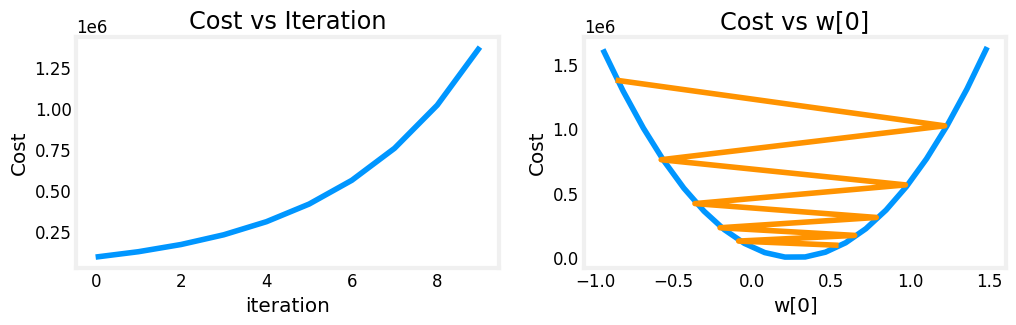

𝛼 = 9e-7

In [ ]:
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 9e-7)
plot_cost_i_w(X_train, y_train, hist)

Cost is decreasing throughout the run showing that alpha is not too large.
So this should converge as iterate more.

Lets increse speed of descent and coverge in less time.

Choosing: 𝛼 = 1e-7



In [ ]:
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 1e-7)
plot_cost_i_w(X_train, y_train, hist)

Thus, seems like lower values of alpha is coverging in less no of iterations(10 repeatations) for the given data.

Lest fix this value and proceed!

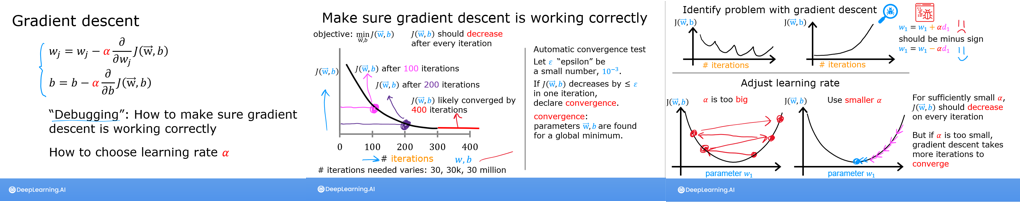

## FI